# 1 Logistic Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = np.loadtxt("ex2data1.txt", delimiter=",")

In [97]:
X = df[:,:2]
# Add one col to X_norm
X = np.hstack((np.ones([X.shape[0],1]), X))
y = df[:,2]
X.shape, y.shape

((100, 3), (100,))

In [108]:
initial_theta = np.zeros((X.shape[1], 1))
initial_theta.shape

(3, 1)

## 1.1 Visualizing Data

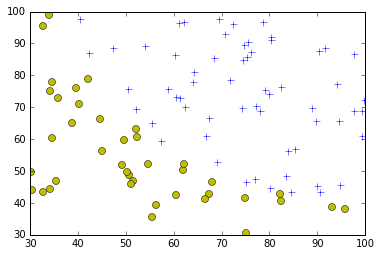

In [72]:
%matplotlib inline
plt.plot(df[:,0][df[:,2] == 1],df[:,1][df[:,2] == 1], "b+", ms=7)
plt.plot(df[:,0][df[:,2] == 0],df[:,1][df[:,2] == 0], "yo",ms=7)

## 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

In [76]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [84]:
print(sigmoid(0))
print(sigmoid(np.array([0,0,1,10])))

0.5
[ 0.5         0.5         0.73105858  0.9999546 ]


### 1.2.2 Cost function and gradient

In [103]:
def costFunction(theta, X, y):
    J = 0
    m = y.size
    grad = np.zeros((theta.size,1))
    
    z = sigmoid(X.dot(theta))
    J = (-1/m) * sum(y.dot(np.log(z)) + (1-y).dot(np.log(1-z)))
    grad = (1/m) * sum((z-y).dot(X))
    
    return J, grad

In [105]:
cost, grad = costFunction(initial_theta, X, y)
print("cost at initial theta 0s", cost)
print("grad at initial theta 0s", grad)

cost at initial theta 0s 0.69314718056
grad at initial theta 0s [  -10.         -1200.92165893 -1126.28422055]


### 1.2.3 Learning parameters using fminunc

In [111]:
# Minimize using scipy fmin_bfgs
from scipy.optimize import fmin_bfgs

fmin_bfgs(costFunction, [X, initial_theta])

TypeError: costFunction() missing 2 required positional arguments: 'X' and 'y'